In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'/Users/chojaehyo/Desktop/2021/ML/Part 2'

In [3]:
# 데이터 불러오기
corolla = pd.read_csv("./data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
#데이터의 수와 변수의 수 확인하기

nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [5]:
#가변수 생성

corolla.Fuel_Type.unique()
dummy_d = np.repeat(0, nCar)
dummy_p = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [6]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
#인덱스 슬라이싱 후 (binary = 1)대입

p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [8]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [9]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [10]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [11]:
Fuel = pd.DataFrame({"Petrol" : dummy_p, "Diesel" : dummy_d, "CNG" : dummy_c})

In [12]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [13]:
corolla_ = corolla.drop(["Id", "Model", "Fuel_Type"], axis = 1, inplace = False)
mlr_data = pd.concat((corolla_, Fuel), 1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [14]:
#bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant="add")
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


- 상수항 추가할 때 주의할 점은 같은 변수에 덮어쓰기 할 때 반복하면 상수항이 계속 추가됨(확인 잘하기)

## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [15]:
feature_columns = list(mlr_data.columns.difference(["Price"]))

X = mlr_data[feature_columns]
y = mlr_data.Price

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [16]:
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [17]:
fitted_full_model.summary()  #R-squared기 높음, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     325.6
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        14:44:45   Log-Likelihood:                -8409.8
No. Observations:                1005   AIC:                         1.689e+04
Df Residuals:                     971   BIC:                         1.705e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -330.4256    126.562     -2.611      0.009    -578.792     -82.059
Age_08_04         -116.2284      3.969    -29.286      0.000    -124.017    -108.440
Airbag_1           391.9975    249.663      1.570      0.117     -97.944     881.939
Airbag_2           -41.5677    130.983     -0.317      0.751    -298.610     215.475
Airco              148.0069     93.082      1.590      0.112     -34.657     330.671
Automatic          247.9882    148.746      1.667      0.096     -43.912     539.888
Automatic_airco   2262.4286    201.793     11.212      0.000    1866.428    2658.429
BOVAG_Guarantee    602.1919    129.201      4.661      0.000     348.646     855.738
Backseat_Divider  -349.6012    131.206     -2.665      0.008    -607.081     -92.121
Boardcomputer     -258.1196    117.972     -2.188      0.029    -489.629     -26.611
CD_Player          225.9686    100.338      2.252      0.025      29.063     422.874
CNG              -1130.3828    220.719     -5.121      0.000   -1563.523    -697.242
Central_Lock       -18.3313    142.234     -0.129      0.897    -297.453     260.790
Cylinders           -0.0401      0.002    -17.177      0.000      -0.045      -0.036
Diesel            -406.2922    190.627     -2.131      0.033    -780.381     -32.203
Doors               36.4632     42.073      0.867      0.386     -46.101     119.028
Gears              251.1450    202.999      1.237      0.216    -147.222     649.512
Guarantee_Period    85.1100     13.696      6.214      0.000      58.233     111.987
HP                  19.3514      3.642      5.314      0.000      12.205      26.498
KM                  -0.0150      0.001    -11.612      0.000      -0.017      -0.012
Met_Color          -27.7444     76.665     -0.362      0.718    -178.193     122.704
Metallic_Rim       245.9020     96.547      2.547      0.011      56.437     435.367
Mfg_Month         -103.0310     10.620     -9.702      0.000    -123.871     -82.191
Mfg_Year            -1.8238      0.897     -2.034      0.042      -3.584      -0.064
Mfr_Guarantee      228.0908     74.444      3.064      0.002      82.001     374.181
Mistlamps         -115.1155    111.908     -1.029      0.304    -334.726     104.495
Petrol            1536.6650    199.340      7.709      0.000    1145.478    1927.852
Power_Steering    -191.9098    272.208     -0.705      0.481    -726.093     342.274
Powered_Windows    345.7722    141.175      2.449      0.014      68.729     622.815
Quarterly_Tax       16.8731      1.864      9.052      0.000      13.215      20.531
Radio             -740.4088    774.960     -0.955      0.340   -2261.198     780.380
Radio_cassette     512.1727    777.679      0.659      0.510   -1013.952    2038.297
Sport_Model        287.3327     90.217      3.185      0.001     110.290     464.375
Tow_Bar           -331.

## VIF를 통한 다중공선성 확인 

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

/Users/chojaehyo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/chojaehyo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


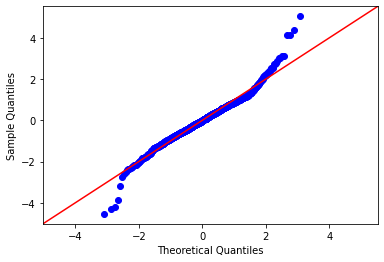

In [19]:
#학습데이터의 잔차 확인
res = fitted_full_model.resid

#q-q plot #정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Redisual')

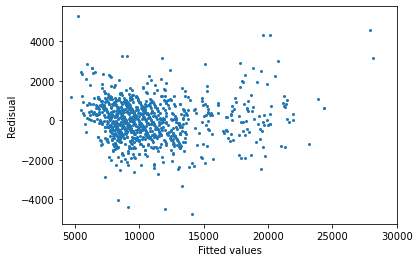

In [20]:
#residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt

fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlim(4000, 30000)
plt.xlabel("Fitted values")
plt.ylabel("Redisual")

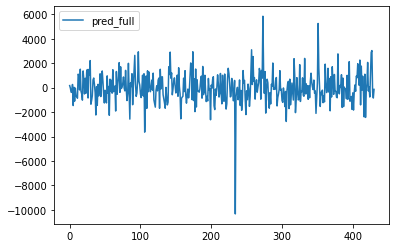

In [21]:
#검증데이터에 대한 예측

pred_y2 = fitted_full_model.predict(test_x)

plt.plot(np.array(test_y-pred_y2), label = "pred_full")
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
#MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

1587937.623516304

## 변수선택법

In [24]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {"model": regr, "AIC": AIC}

print(processSubset(X=train_x, y = train_y, feature_set=feature_columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef6b9dbca0>, 'AIC': 16887.599451656828}


In [25]:
processSubset(X=train_x, y = train_y, feature_set=feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fef6b9d59a0>,
 'AIC': 16887.599451656828}

In [26]:
import time
import itertools

def getBest(X, y, k):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(X.columns.difference(['const']), k):
        combo = (list(combo)+['const'])
        
        results.append(processSubset(X, y, feature_set=combo))
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y, k=2))

Processed 630 models on 2 predictors in 0.4196929931640625 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                  17561
Name: 211, dtype: object


In [27]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
        print(list(combo)+['const'])

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [28]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()

for i in range(1, 4):
    models.loc[i] = getBest(X=train_x, y=train_y, k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds")

Processed 36 models on 1 predictors in 0.04460787773132324 seconds.
Processed 630 models on 2 predictors in 0.48551511764526367 seconds.
Processed 7140 models on 3 predictors in 5.4359047412872314 seconds.
Total elapsed time: 6.026693105697632 seconds


In [29]:
models

,AIC,model
1,17810.160316,<statsmodels.regression.linear_model.Regressio...
2,17561.043478,<statsmodels.regression.linear_model.Regressio...
3,17346.693557,<statsmodels.regression.linear_model.Regressio...


In [30]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2068.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        14:44:53   Log-Likelihood:                -8669.3
No. Observations:                1005   AIC:                         1.735e+04
Df Residuals:                    1001   BIC:                         1.737e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0244      0.001    -18.225      0.000      -0.027      -0.022
Mfg_Year    1459.2762     37.991     38.411      0.000    1384.725    1533.827
Weight        20.1839      0.982     20.557      0.000      18.257      22.111
const      -2.927e+06   7.55e+04    -38.787      0.000   -3.08e+06   -2.78e+06
==============================================================================
Omnibus:                      200.468   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2165.307
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                      10.099   Cond. No.                     1.41e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ", "{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC ", "{:.5f}".format(fitted_full_model.aic))
print("selected model Rsquared ", "{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC ", "{:.5f}".format(models.loc[3, "model"].aic))

full model Rsquared:  0.91712
full model AIC  16887.59945
selected model Rsquared  0.86107
selected model AIC  17346.69356


Text(0, 0.5, 'BIC')

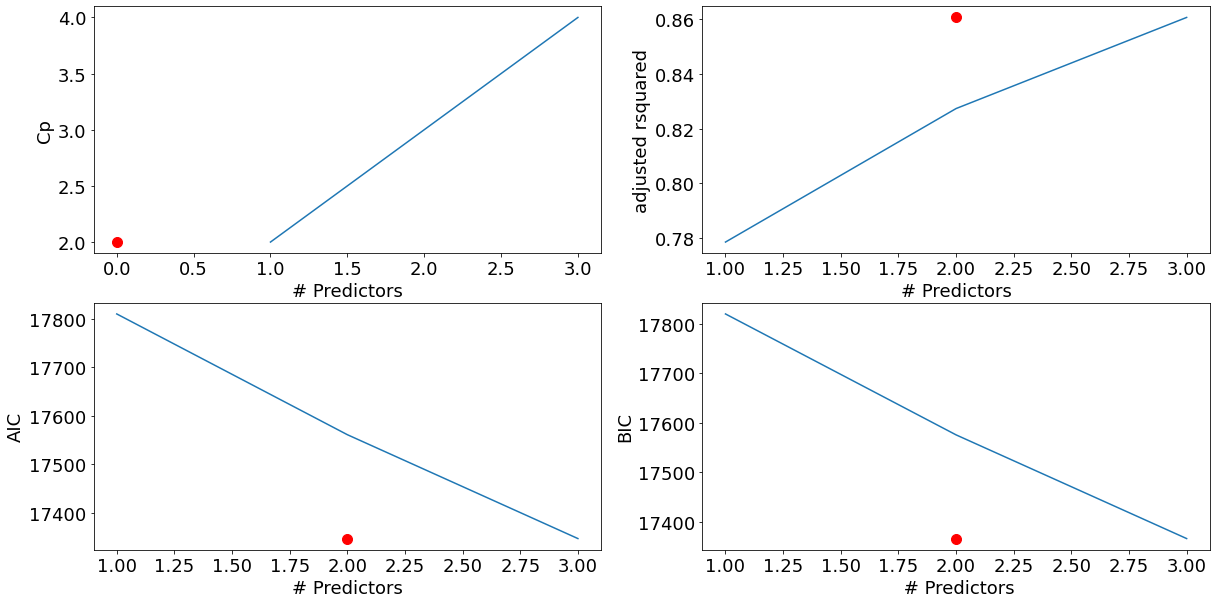

In [32]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp = models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [33]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [34]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [35]:
Forward_best_model = forward_model(X = train_x, y = train_y)

Processed  36 models on 1 predictors in 0.03365612030029297
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef385e0760>
Processed  35 models on 2 predictors in 0.033921003341674805
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef6c3cf1c0>
Processed  34 models on 3 predictors in 0.03214693069458008
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef385f9fd0>
Processed  33 models on 4 predictors in 0.03870987892150879
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef386155e0>
Processed  32 models on 5 predictors in 0.03178906440734863
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM

In [36]:
Forward_best_model.aic

16874.472698002523

In [37]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     511.9
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        14:44:54   Log-Likelihood:                -8415.2
No. Observations:                1005   AIC:                         1.687e+04
Df Residuals:                     983   BIC:                         1.698e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1385.3102     45.903     30.179      0.000    1295.232    1475.389
Automatic_airco   2192.4358    191.454     11.451      0.000    1816.730    2568.141
HP                  17.8382      3.449      5.172      0.000      11.070      24.606
Weight              15.1454      1.262     11.999      0.000      12.668      17.622
KM                  -0.0151      0.001    -11.958      0.000      -0.018      -0.013
Powered_Windows    318.5944     84.575      3.767      0.000     152.626     484.563
BOVAG_Guarantee    653.5816    126.231      5.178      0.000     405.868     901.295
Guarantee_Period    87.0035     13.473      6.458      0.000      60.564     113.443
Quarterly_Tax       17.1826      1.795      9.572      0.000      13.660      20.705
Petrol           -6.934e+05   2.29e+04    -30.323      0.000   -7.38e+05   -6.49e+05
Tow_Bar           -317.9657     78.098     -4.071      0.000    -471.224    -164.708
Metallic_Rim       230.3142     90.505      2.545      0.011      52.709     407.919
ABS               -316.8402    100.729     -3.145      0.002    -514.509    -119.172
Sport_Model        303.4136     84.507      3.590      0.000     137.580     469.248
Backseat_Divider  -378.3677    118.936     -3.181      0.002    -611.765    -144.971
Mfr_Guarantee      222.2324     73.333      3.030      0.003      78.326     366.139
Radio             -220.3481    104.004     -2.119      0.034    -424.443     -16.254
Boardcomputer     -241.2910    116.166     -2.077      0.038    -469.253     -13.329
CD_Player          195.1859     98.580      1.980      0.048       1.735     388.637
Diesel           -6.955e+05   2.29e+04    -30.429      0.000    -7.4e+05   -6.51e+05
Airco              123.6600     87.427      1.414      0.158     -47.904     295.224
CNG              -6.961e+05   2.29e+04    -30.432      0.000   -7.41e+05   -6.51e+05
const            -2.085e+06   6.86e+04    -30.396      0.000   -2.22e+06   -1.95e+06
==============================================================================
Omnibus:                       69.719   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.873
Skew:                           0.151   Prob(JB):                     8.39e-63
Kurtosis:                       5.595   Cond. No.                     6.74e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 후진소거법

In [38]:
######## 후진소거법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [39]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [40]:
Backward_best_model = backward_model(X = train_x, y = train_y)

Processed  36 models on 35 predictors in 0.10657596588134766
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef6c3b4940>
Processed  35 models on 34 predictors in 0.10214090347290039
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr

In [41]:
Backward_best_model.aic

16874.51604760191

In [42]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     536.8
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        14:44:55   Log-Likelihood:                -8416.3
No. Observations:                1005   AIC:                         1.687e+04
Df Residuals:                     984   BIC:                         1.698e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -305.9191    100.484     -3.044      0.002    -503.106    -108.732
Automatic_airco   2189.1639    191.537     11.429      0.000    1813.295    2565.033
BOVAG_Guarantee    654.5930    126.293      5.183      0.000     406.758     902.428
Backseat_Divider  -371.5265    118.898     -3.125      0.002    -604.849    -138.204
Boardcomputer     -240.4109    116.224     -2.069      0.039    -468.486     -12.336
CD_Player          199.4889     98.583      2.024      0.043       6.032     392.946
CNG               -665.0777    347.931     -1.912      0.056   -1347.849      17.693
Cylinders         -6.59e+05   2.13e+04    -30.989      0.000   -7.01e+05   -6.17e+05
Guarantee_Period    87.1505     13.480      6.465      0.000      60.699     113.603
HP                  18.3637      3.431      5.353      0.000      11.632      25.096
KM                  -0.0149      0.001    -11.870      0.000      -0.017      -0.012
Metallic_Rim       237.1584     90.421      2.623      0.009      59.717     414.599
Mfg_Year          1395.3383     45.375     30.751      0.000    1306.296    1484.381
Mfr_Guarantee      222.1696     73.370      3.028      0.003      78.190     366.149
Petrol            2087.5997    295.586      7.063      0.000    1507.549    2667.651
Powered_Windows    371.8548     75.769      4.908      0.000     223.168     520.541
Quarterly_Tax       17.1213      1.795      9.536      0.000      13.598      20.645
Radio             -225.3534    103.996     -2.167      0.030    -429.433     -21.274
Sport_Model        297.1686     84.434      3.520      0.000     131.477     462.860
Tow_Bar           -318.3336     78.137     -4.074      0.000    -471.669    -164.999
Weight              15.2391      1.261     12.084      0.000      12.764      17.714
const            -1.647e+05   5316.371    -30.989      0.000   -1.75e+05   -1.54e+05
==============================================================================
Omnibus:                       68.141   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.400
Skew:                           0.135   Prob(JB):                     3.52e-61
Kurtosis:                       5.564   Cond. No.                     1.08e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 단계적 선택법

In [43]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [44]:
Stepwise_best_model = Stepwise_model(X=train_x, y=train_y)

Processed  36 models on 1 predictors in 0.028599023818969727
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef58a4f640>
forward
Processed  1 models on 0 predictors in 0.0015530586242675781
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef58a5e880>
Processed  35 models on 2 predictors in 0.030258893966674805
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef58a4ffd0>
forward
Processed  2 models on 1 predictors in 0.0038902759552001953
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef6c3b7b80>
Processed  34 models on 3 predictors in 0.045346736907958984
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionRes

Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Metallic_Rim', 'Sport_Model', 'Backseat_Divider', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef58a6c220>
Processed  21 models on 16 predictors in 0.03437519073486328
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Metallic_Rim', 'ABS', 'Sport_Model', 'Backseat_Divider', 'Mfr_Guarantee', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef58a4fe20>
forward
Processed  16 models on 15 predictors in 0.025671958923339844
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Metallic_Rim', 'Sport_M

Processed  14 models on 23 predictors in 0.025161027908325195
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Metallic_Rim', 'ABS', 'Sport_Model', 'Backseat_Divider', 'Mfr_Guarantee', 'Radio', 'Boardcomputer', 'CD_Player', 'Diesel', 'Airco', 'CNG', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef6c39efa0>
forward
Processed  23 models on 22 predictors in 0.03509092330932617
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Metallic_Rim', 'ABS', 'Sport_Model', 'Backseat_Divider', 'Mfr_Guarantee', 'Radio', 'Boardcomputer', 'CD_Player', 'Diesel', 'Airco', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef58a5c5b0>
backward
Processed  14 model

Processed  23 models on 22 predictors in 0.043192148208618164
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Metallic_Rim', 'ABS', 'Sport_Model', 'Backseat_Divider', 'Mfr_Guarantee', 'Radio', 'Boardcomputer', 'CD_Player', 'Diesel', 'Airco', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef6c39e580>
backward
Processed  14 models on 23 predictors in 0.024072885513305664
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Metallic_Rim', 'ABS', 'Sport_Model', 'Backseat_Divider', 'Mfr_Guarantee', 'Radio', 'Boardcomputer', 'CD_Player', 'Diesel', 'Airco', 'CNG', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fef58a4f580>
forward
Processed  23 mode

In [45]:
Stepwise_best_model.aic

16874.472698002523

# 성능평가 

In [46]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(23,) (22,) (23,)


In [47]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [48]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [49]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [50]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL     FORWARD     BACKWARD    STEPWISE
MSE   1.58794e+06  1.5891e+06  1.60257e+06  1.5891e+06
RMSE      1260.13      1260.6      1265.92      1260.6
MAE       912.577     909.505      917.611     909.505
MAPE       8.9247     8.87237      8.95686     8.87237


In [51]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
23
22
23


In [52]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     325.6
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        14:44:57   Log-Likelihood:                -8409.8
No. Observations:                1005   AIC:                         1.689e+04
Df Residuals:                     971   BIC:                         1.705e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -330.4256    126.562     -2.611      0.009    -578.792     -82.059
Age_08_04         -116.2284      3.969    -29.286      0.000    -124.017    -108.440
Airbag_1           391.9975    249.663      1.570      0.117     -97.944     881.939
Airbag_2           -41.5677    130.983     -0.317      0.751    -298.610     215.475
Airco              148.0069     93.082      1.590      0.112     -34.657     330.671
Automatic          247.9882    148.746      1.667      0.096     -43.912     539.888
Automatic_airco   2262.4286    201.793     11.212      0.000    1866.428    2658.429
BOVAG_Guarantee    602.1919    129.201      4.661      0.000     348.646     855.738
Backseat_Divider  -349.6012    131.206     -2.665      0.008    -607.081     -92.121
Boardcomputer     -258.1196    117.972     -2.188      0.029    -489.629     -26.611
CD_Player          225.9686    100.338      2.252      0.025      29.063     422.874
CNG              -1130.3828    220.719     -5.121      0.000   -1563.523    -697.242
Central_Lock       -18.3313    142.234     -0.129      0.897    -297.453     260.790
Cylinders           -0.0401      0.002    -17.177      0.000      -0.045      -0.036
Diesel            -406.2922    190.627     -2.131      0.033    -780.381     -32.203
Doors               36.4632     42.073      0.867      0.386     -46.101     119.028
Gears              251.1450    202.999      1.237      0.216    -147.222     649.512
Guarantee_Period    85.1100     13.696      6.214      0.000      58.233     111.987
HP                  19.3514      3.642      5.314      0.000      12.205      26.498
KM                  -0.0150      0.001    -11.612      0.000      -0.017      -0.012
Met_Color          -27.7444     76.665     -0.362      0.718    -178.193     122.704
Metallic_Rim       245.9020     96.547      2.547      0.011      56.437     435.367
Mfg_Month         -103.0310     10.620     -9.702      0.000    -123.871     -82.191
Mfg_Year            -1.8238      0.897     -2.034      0.042      -3.584      -0.064
Mfr_Guarantee      228.0908     74.444      3.064      0.002      82.001     374.181
Mistlamps         -115.1155    111.908     -1.029      0.304    -334.726     104.495
Petrol            1536.6650    199.340      7.709      0.000    1145.478    1927.852
Power_Steering    -191.9098    272.208     -0.705      0.481    -726.093     342.274
Powered_Windows    345.7722    141.175      2.449      0.014      68.729     622.815
Quarterly_Tax       16.8731      1.864      9.052      0.000      13.215      20.531
Radio             -740.4088    774.960     -0.955      0.340   -2261.198     780.380
Radio_cassette     512.1727    777.679      0.659      0.510   -1013.952    2038.297
Sport_Model        287.3327     90.217      3.185      0.001     110.290     464.375
Tow_Bar           -331.

In [53]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     511.9
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        14:44:57   Log-Likelihood:                -8415.2
No. Observations:                1005   AIC:                         1.687e+04
Df Residuals:                     983   BIC:                         1.698e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1385.3102     45.903     30.179      0.000    1295.232    1475.389
Automatic_airco   2192.4358    191.454     11.451      0.000    1816.730    2568.141
HP                  17.8382      3.449      5.172      0.000      11.070      24.606
Weight              15.1454      1.262     11.999      0.000      12.668      17.622
KM                  -0.0151      0.001    -11.958      0.000      -0.018      -0.013
Powered_Windows    318.5944     84.575      3.767      0.000     152.626     484.563
BOVAG_Guarantee    653.5816    126.231      5.178      0.000     405.868     901.295
Guarantee_Period    87.0035     13.473      6.458      0.000      60.564     113.443
Quarterly_Tax       17.1826      1.795      9.572      0.000      13.660      20.705
Petrol           -6.934e+05   2.29e+04    -30.323      0.000   -7.38e+05   -6.49e+05
Tow_Bar           -317.9657     78.098     -4.071      0.000    -471.224    -164.708
Metallic_Rim       230.3142     90.505      2.545      0.011      52.709     407.919
ABS               -316.8402    100.729     -3.145      0.002    -514.509    -119.172
Sport_Model        303.4136     84.507      3.590      0.000     137.580     469.248
Backseat_Divider  -378.3677    118.936     -3.181      0.002    -611.765    -144.971
Mfr_Guarantee      222.2324     73.333      3.030      0.003      78.326     366.139
Radio             -220.3481    104.004     -2.119      0.034    -424.443     -16.254
Boardcomputer     -241.2910    116.166     -2.077      0.038    -469.253     -13.329
CD_Player          195.1859     98.580      1.980      0.048       1.735     388.637
Diesel           -6.955e+05   2.29e+04    -30.429      0.000    -7.4e+05   -6.51e+05
Airco              123.6600     87.427      1.414      0.158     -47.904     295.224
CNG              -6.961e+05   2.29e+04    -30.432      0.000   -7.41e+05   -6.51e+05
const            -2.085e+06   6.86e+04    -30.396      0.000   -2.22e+06   -1.95e+06
==============================================================================
Omnibus:                       69.719   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.873
Skew:                           0.151   Prob(JB):                     8.39e-63
Kurtosis:                       5.595   Cond. No.                     6.74e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""